In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import utils, callbacks
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Add, Input, ZeroPadding2D, AveragePooling2D,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt
import cv2
from glob import glob
from numpy import floor
import random
from numpy.random import seed
seed(1)

ASL Alphabet for letter: S


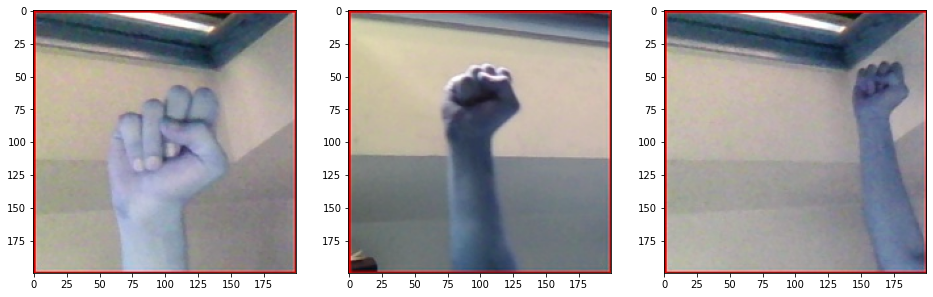

In [2]:
def plot_three_samples(letter):
    print("ASL Alphabet for letter: "+letter)
    base_path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents,3)
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(imgs[2]))
    
    return

plot_three_samples('S')

In [3]:
path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
path_test = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
target_size = (64,64)
target_dims = (64,64,3)
val_frac = 0.1
n_classes = 29
batch_size = 64

image_generator = ImageDataGenerator(samplewise_center = True, samplewise_std_normalization = True, validation_split=val_frac)

train_gen = image_generator.flow_from_directory(path, target_size=target_size, batch_size=batch_size, shuffle=True, subset='training')
val_gen = image_generator.flow_from_directory(path, target_size=target_size, subset='validation')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [4]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
VGG = tf.keras.Sequential()
VGG.add(VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3)))
VGG.add(Flatten())
VGG.add(Dense(256, activation='relu'))
VGG.add(Dense(29, activation='softmax'))

VGG.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'] )
VGG.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 29)                7453      
Total params: 15,246,685
Trainable params: 15,246,685
Non-trainable params: 0
_________________________________________________________________


In [5]:
vgg_model = VGG.fit(train_gen, epochs=10, validation_data = val_gen)

Epoch 1/10
1224/1224 [==============================] - 833s 674ms/step - loss: 2.1256 - accuracy: 0.3758 - val_loss: 2.3061 - val_accuracy: 0.8287
Epoch 2/10
1224/1224 [==============================] - 822s 671ms/step - loss: 0.6003 - accuracy: 0.9406 - val_loss: 0.3821 - val_accuracy: 0.9084
Epoch 3/10
1224/1224 [==============================] - 822s 671ms/step - loss: 0.0757 - accuracy: 0.9789 - val_loss: 0.3990 - val_accuracy: 0.8979
Epoch 4/10
1224/1224 [==============================] - 822s 671ms/step - loss: 0.0506 - accuracy: 0.9861 - val_loss: 0.2016 - val_accuracy: 0.9437
Epoch 5/10
1224/1224 [==============================] - 822s 671ms/step - loss: 0.0382 - accuracy: 0.9899 - val_loss: 0.2478 - val_accuracy: 0.9355
Epoch 6/10
1224/1224 [==============================] - 822s 671ms/step - loss: 0.0510 - accuracy: 0.9867 - val_loss: 0.3556 - val_accuracy: 0.9252
Epoch 7/10
1224/1224 [==============================] - 822s 671ms/step - loss: 0.0730 - accuracy: 0.9831 - val_